In [1]:
range(3)

[0, 1, 2]

In [2]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

folder = 'figures'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-08-11 16:04:33	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure1_supplementary_post_splicing_filtering/datapackage.json
2016-08-11 16:04:33	Parsing datapackage to create a Study object
2016-08-11 16:05:14 	Initializing Study
2016-08-11 16:05:14 	Initializing Predictor configuration manager for Study
2016-08-11 16:05:14	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-08-11 16:05:14	Added ExtraTreesClassifier to default predictors
2016-08-11 16:05:14	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-08-11 16:05:14	Added ExtraTreesRegressor to default predictors
2016-08-11 16:05:14	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-08-11 16:05:14	Added GradientBoostingClassifier to default predictors
2016-08-11 16:05:14	Predictor GradientBoostingRegressor is of t

In [3]:
from sklearn.manifold import TSNE

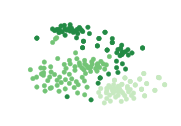

In [4]:
expression_manifolder = TSNE(perplexity=30, learning_rate=100)
expression_manifolded = pd.DataFrame(expression_manifolder.fit_transform(study.expression.data), 
                                     index=study.expression.data.index)

fig, ax = plt.subplots(figsize=(3, 2))

color = [study.phenotype_to_color[study.sample_id_to_phenotype[x]] for x in expression_manifolded.index]

ax.scatter(expression_manifolded[0], expression_manifolded[1], color=color)
ax.set(xticks=[], yticks=[])
sns.despine(bottom=True, left=True)

In [5]:
splicing = study.splicing.data
splicing_fillna = splicing.fillna(splicing.mean())

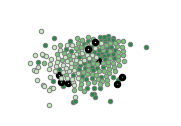

In [6]:
splicing_manifolder = TSNE(learning_rate=500, metric='cityblock', perplexity=5, early_exaggeration=1, 
                           min_grad_norm=1e-20, init='pca')
splicing_manifolded = pd.DataFrame(splicing_manifolder.fit_transform(splicing_fillna), index=study.splicing.data.index)

fig, ax = plt.subplots(figsize=(3, 2))

color = [study.phenotype_to_color[study.sample_id_to_phenotype[x]] for x in splicing_manifolded.index]

for phenotype, df1 in splicing_manifolded.groupby(study.sample_id_to_phenotype):
    color = study.phenotype_to_color[phenotype]
    for if_pooled, df2 in df1.groupby(study.metadata.data['pooled']):
        edgecolor = 'black' if if_pooled else 'grey'
        linewidth = 3 if if_pooled else 1
        ax.scatter(df2[0], df2[1], color=color, linewidths=linewidth, edgecolor=edgecolor)
ax.set(xticks=[], yticks=[])
sns.despine(bottom=True, left=True)

In [7]:
splicing_sample_corr = splicing.T.corr()
print(splicing_sample_corr.shape)
splicing_sample_corr.head()

(204, 204)


sample_id,CVN_01,CVN_02,CVN_03,CVN_04,CVN_05,CVN_06,CVN_07,CVN_08,CVN_09,CVN_11,...,P8_01,P8_02,P8_05,P8_06,P8_10,P8_11,P9_01,P9_02,P9_03,P9_04
sample_id,,,,,,,,,,,,,,,,,,,,,
CVN_01,1.000000,0.898312,0.933125,0.889478,0.899772,0.898062,0.903982,0.905813,0.904318,0.902577,...,0.893989,0.890238,0.903543,0.880361,0.881985,0.892569,0.885201,0.890796,0.892477,0.893778
CVN_02,0.898312,1.000000,0.917617,0.902508,0.918135,0.903007,0.920027,0.910035,0.921301,0.915583,...,0.910801,0.879669,0.900321,0.893794,0.898724,0.897592,0.878752,0.903641,0.901953,0.907413
CVN_03,0.933125,0.917617,1.000000,0.920139,0.914975,0.909883,0.908218,0.917256,0.940303,0.909621,...,0.912870,0.911182,0.909086,0.897294,0.908661,0.912749,0.902319,0.902517,0.910783,0.918398
CVN_04,0.889478,0.902508,0.920139,1.000000,0.884780,0.882956,0.887485,0.889689,0.898766,0.899067,...,0.886134,0.878029,0.892694,0.898808,0.890510,0.890797,0.894599,0.898416,0.892981,0.896173
CVN_05,0.899772,0.918135,0.914975,0.884780,1.000000,0.899380,0.906945,0.896034,0.905179,0.914105,...,0.895442,0.876427,0.893454,0.883774,0.886966,0.889046,0.879128,0.895296,0.894510,0.895188


In [8]:
splicing_corr_manifolder = TSNE()
splicing_corr_manifolded = pd.DataFrame(splicing_corr_manifolder.fit_transform(splicing_sample_corr, 
                                                                               index=study.splicing.data.index)

fig, ax = plt.subplots(figsize=(3, 2))

color = [study.phenotype_to_color[study.sample_id_to_phenotype[x]] for x in splicing_manifolded.index]

for phenotype, df1 in splicing_corr_manifolded.groupby(study.sample_id_to_phenotype):
    color = study.phenotype_to_color[phenotype]
    for if_pooled, df2 in df1.groupby(study.metadata.data['pooled']):
        edgecolor = 'black' if if_pooled else 'grey'
        linewidth = 3 if if_pooled else 1
        ax.scatter(df2[0], df2[1], color=color, linewidths=linewidth, edgecolor=edgecolor)
ax.set(xticks=[], yticks=[])
sns.despine(bottom=True, left=True)

SyntaxError: invalid syntax (<ipython-input-8-6143478ac06a>, line 5)